In [1]:
# project: p2
# submitter: kukunooru
# partner: none
# hours: 4

In [2]:
import loans
import search
import time
import random
import matplotlib.pyplot as plt


In [3]:
newBank = loans.Bank("First Home Bank")

In [4]:
#Q1
bankList = newBank.loanList
avgInterestRate = [] 
for loan in bankList:
    if loan.interest_rate != -1:
        avgInterestRate.append(loan.interest_rate) 
sum(avgInterestRate)/len(avgInterestRate)

2.8333333333333335

In [5]:
#Q2
num_applicants = [] 
for loan in bankList: 
    num_applicants.append(loan.num_applicants)
sum(num_applicants)/len(num_applicants)

1.3043478260869565

In [6]:
#Q3
ageDist = {}
for loan in bankList: 
    applicantList = loan.applicants
    for applicant in applicantList: 
        if applicant.age not in ageDist: 
            ageDist[applicant.age] = 1
        else: 
            ageDist[applicant.age] += 1
ageDist

{'55-64': 12, '45-54': 8, '65-74': 3, '25-34': 3, '35-44': 1, '>74': 3}

In [7]:
loanBST = search.BST()
for loan in bankList: 
    loanBST.add(loan.interest_rate, loan)

In [8]:
#Q4
len(loanBST[-1])

11

In [9]:
#Q5
def find_height(node):
    if node is None:
        return -1 
    else:
        left_height = find_height(node.left)
        right_height = find_height(node.right)
        return 1 + max(left_height, right_height)
find_height(loanBST.root)

5

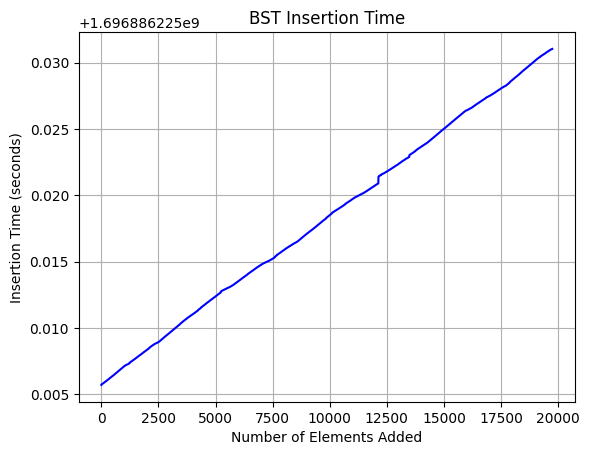

In [10]:
#Q6
uwcu = loans.Bank("University of Wisconsin Credit Union")
insertion_times = []
uwcuBST = search.BST() 
for loan in uwcu.loanList:
    uwcuBST.add(loan.interest_rate, loan) 
    end = time.time() 
    insertion_times.append(end)
plt.plot(range(1, len(uwcu.loanList) + 1), insertion_times, linestyle='-', color='b')
plt.xlabel('Number of Elements Added')
plt.ylabel('Insertion Time (seconds)')
plt.title('BST Insertion Time')
plt.grid(True)
plt.show()


<BarContainer object of 2 artists>

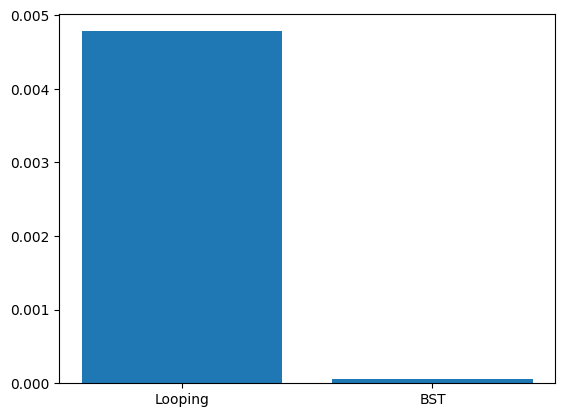

In [11]:
#Q7 
firstTime = 0 
start = time.time()
counter = 0
for loan in uwcu.loanList:
    if loan.interest_rate == -1:
        counter += 1
end = time.time() 
firstTime = end - start
#############################
secondTime = 0 
start = time.time()
len(uwcuBST[-1]) 
end = time.time() 
secondTime = end - start 
plt.bar(['Looping', 'BST'], [firstTime, secondTime])

<BarContainer object of 6 artists>

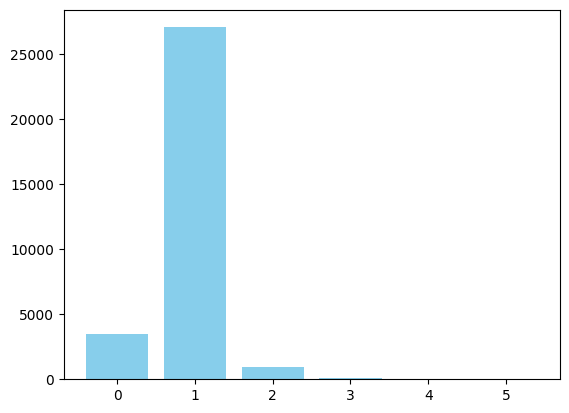

In [12]:
#Q8
racialIdentities = {}
for loan in uwcu.loanList:
    for applicant in loan.applicants:  
        if len(applicant.race) in racialIdentities:
            racialIdentities[len(applicant.race)] += 1 
        else: 
            racialIdentities[len(applicant.race)] = 1
categories = list(racialIdentities.keys())
vals = list(racialIdentities.values())
plt.bar(categories, vals, color='skyblue')


In [13]:
#Q9
def count_leaf_nodes(node):
    if node is None:
        return 0
    
    # If the current node is a leaf node, return 1
    if node.left is None and node.right is None:
        return 1
    
    # Recursively count leaf nodes in left and right subtrees
    left_leaves = count_leaf_nodes(node.left)
    right_leaves = count_leaf_nodes(node.right)
    
    # Return the total count of leaf nodes in the tree
    return left_leaves + right_leaves
count_leaf_nodes(uwcuBST.root)

13

In [14]:
#Q10
def in_order_traversal(node, result):
    if node is None:
        return
    in_order_traversal(node.left, result)
    result.append(node.key)
    in_order_traversal(node.right, result)
def top_n_keys(node, n):
    keys = []
    in_order_traversal(node, keys)
    sorted_keys = sorted(keys, reverse=True)
    return sorted_keys[:n]
top_n_keys(uwcuBST.root, 5)[4]

6.49